In [77]:
import torch
weights = torch.load('weights/model_weights')

enc_embeds = weights['encoder.embed.embed.weight'].numpy()
dec_embeds = weights['decoder.embed.embed.weight'].numpy()

enc_embeds.shape, dec_embeds.shape

((203, 16), (340, 16))

In [74]:
import pickle

src_voc = pickle.load(open('SRC_vocab.p', 'rb'))
trg_voc = pickle.load(open('TRG_vocab.p', 'rb'))

len(src_voc), len(trg_voc)

(203, 340)

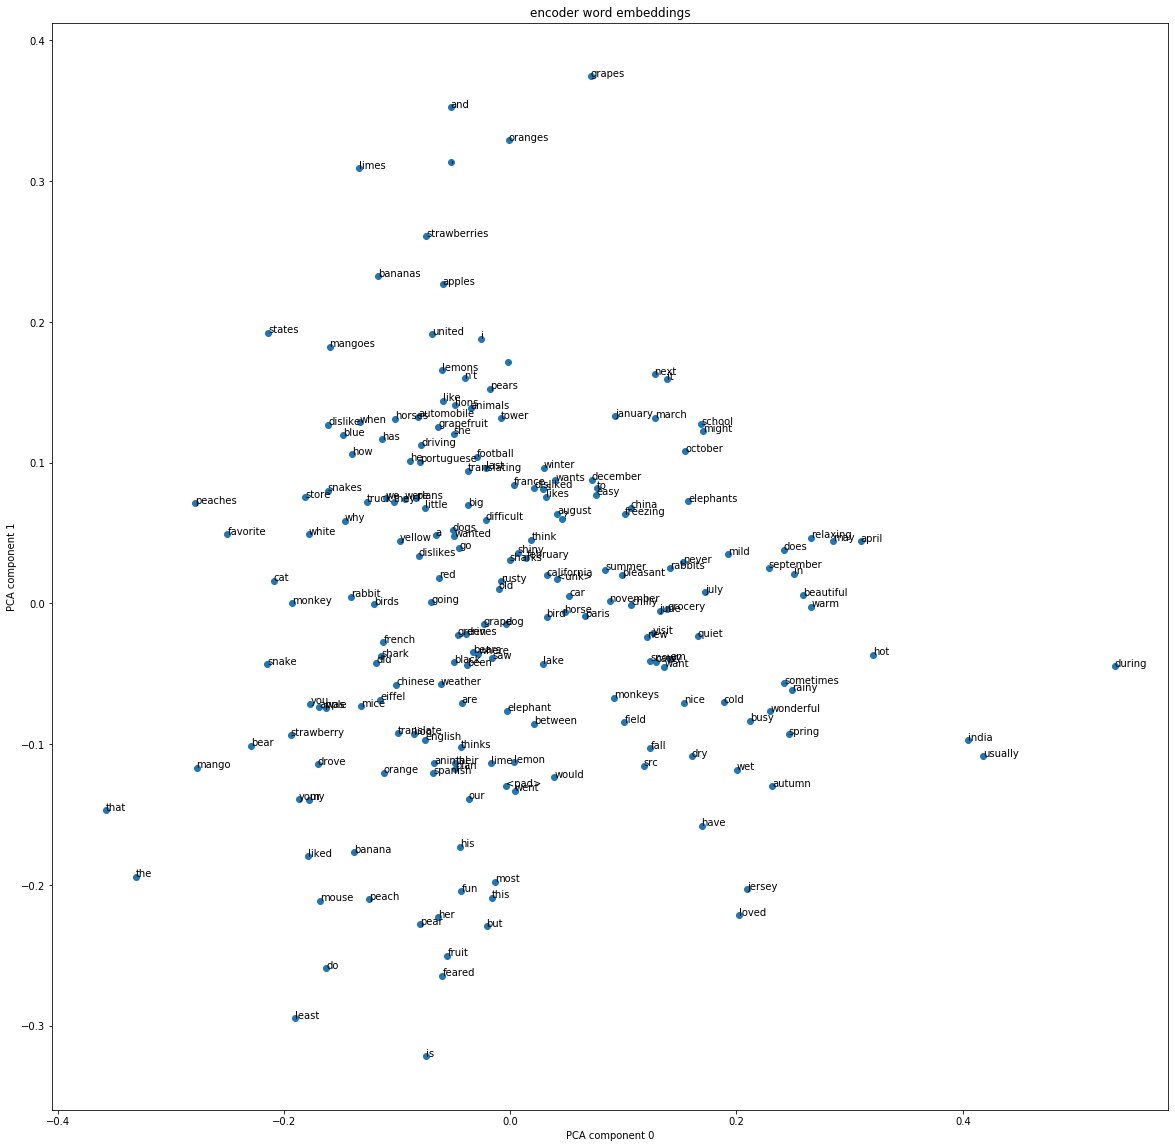

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

transformer = PCA(2)

enc_embeds_pca = transformer.fit_transform(enc_embeds)
plt.figure(figsize=(20, 20))
plt.scatter(enc_embeds_pca[:, 0], enc_embeds_pca[:, 1],)

for i in range(len(enc_embeds)):
  plt.text(enc_embeds_pca[i, 0], enc_embeds_pca[i, 1], list(src_voc.stoi.keys())[i])

plt.title('encoder word embeddings')
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1');

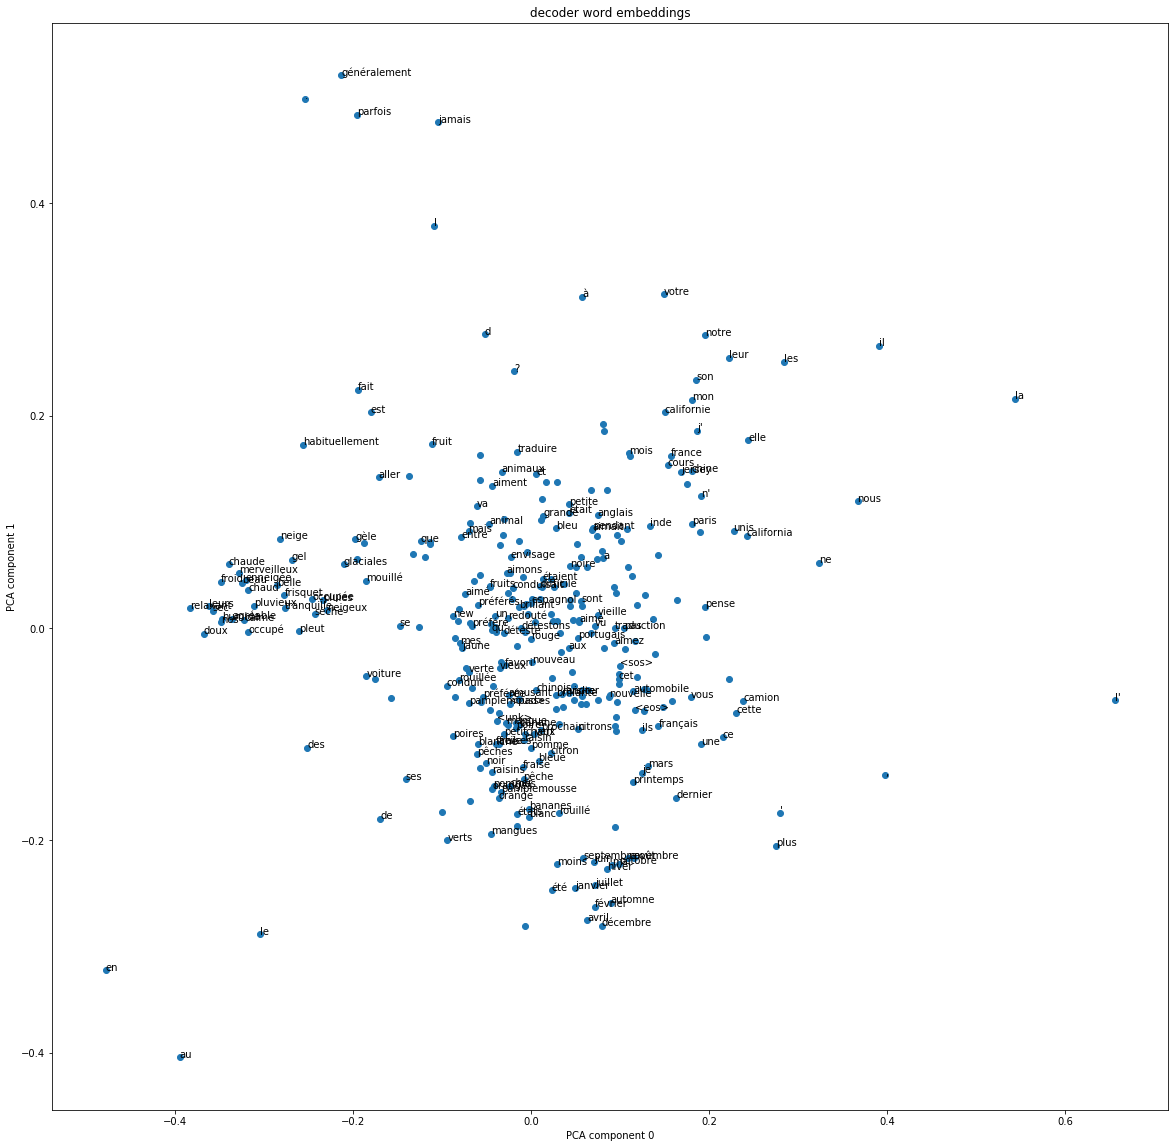

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

transformer = PCA(2)

dec_embeds_pca = transformer.fit_transform(dec_embeds)
plt.figure(figsize=(20, 20))
plt.scatter(dec_embeds_pca[:, 0], dec_embeds_pca[:, 1],)

for i in range(len(enc_embeds)):
  plt.text(dec_embeds_pca[i, 0], dec_embeds_pca[i, 1], list(trg_voc.stoi.keys())[i])

plt.title('decoder word embeddings')
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1');